# Text Mining Project - Graph Representation of Topic Model

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from igraph import *
import numpy as np

## Read incidence matrix of LSI Topic Model

In [166]:
df = pd.read_csv('IncidenceMatrixLSI.csv'); print(df.shape, df.size)
df.head()

(13, 75) 975


,topic,word,child,hand,dove,night,denomination,body,water,scripture,...,supper,lamb,baptism,sin,desert,building,street,writer,friend,privilege
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
#replace all NaN's with zeros
df = df.fillna(0)

In [168]:
#convert all entries to integers
df = df.astype(int)

In [169]:
#convert dataframe to matrix
m = df.as_matrix()

/home/proj/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [170]:
#convert matrix to a list of lists
m = m.tolist()

## Create Bipartite Graph of LSI Topic Model

In [171]:
gr = Graph.Incidence(m, directed=False, mode=ALL, multiple=False)

In [172]:
#inspect graph
print(gr)

IGRAPH U--T 88 142 --
+ attr: type (v)
+ edges:
0--14 0--15 0--16 0--17 0--18 0--19 0--20 0--21 0--22 0--23 1--13 1--14 1--15
1--16 1--17 1--19 1--24 1--25 1--26 1--27 1--28 2--13 2--15 2--19 2--21 2--23
2--29 2--30 2--31 2--32 2--33 2--34 3--13 3--14 3--15 3--19 3--35 3--36 3--37
3--38 3--39 3--40 3--41 4--13 4--15 4--17 4--19 4--39 4--42 4--43 4--44 4--45
4--46 4--47 5--13 5--19 5--36 5--38 5--40 5--41 5--42 5--43 5--45 5--48 5--49
6--13 6--20 6--23 6--44 6--50 6--51 6--52 6--53 6--54 6--55 6--56 7--13 7--19
7--20 7--42 7--43 7--45 7--53 7--57 7--58 7--59 7--60 8--13 8--15 8--16 8--40
8--41 8--48 8--51 8--57 8--61 8--62 8--63 9--13 9--15 9--35 9--56 9--61 9--64
9--65 9--66 9--67 9--68 9--69 10--13 10--20 10--23 10--25 10--56 10--61 10--70
10--71 10--72 10--73 10--74 11--13 11--20 11--21 11--53 11--75 11--76 11--77
11--78 11--79 11--80 11--81 12--13 12--16 12--23 12--42 12--71 12--82 12--83
12--84 12--85 12--86 12--87


In [173]:
#inspect vertex attributes
gr.vertex_attributes()

['type']

In [174]:
print(gr.vs['type'])
print(len(gr.vs['type']))

[False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
88


### Prepare names for vertices

In [175]:
topics = [0,1,2,3,4,5,6,7,8,9,10,11,12]
words = list(df.columns[1:])
#words = list(df.columns)
print(words)

['word', 'child', 'hand', 'dove', 'night', 'denomination', 'body', 'water', 'scripture', 'message', 'wing', 'sign', 'snow', 'love', 'bird', 'thirst', 'soul', 'deer', 'desire', 'dog', 'light', 'mother', 'boy', 'father', 'choice', 'morning', 'ark', 'revival', 'inspiration', 'eye', 'husband', 'faith', 'alter', 'channel', 'king', 'leader', 'door', 'sacrifice', 'gate', 'bread', 'house', 'daughter', 'death', 'wheat', 'school', 'earth', 'germ', 'voice', 'blood', 'hour', 'nature', 'leadership', 'thinking', 'revelation', 'teacher', 'businessman', 'prophecy', 'wilderness', 'group', 'son', 'evening', 'communion', 'ordinance', 'order', 'supper', 'lamb', 'baptism', 'sin', 'desert', 'building', 'street', 'writer', 'friend', 'privilege']


In [176]:
my_vertex_names = topics + words
print(my_vertex_names)
gr.vs['name'] = my_vertex_names

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'word', 'child', 'hand', 'dove', 'night', 'denomination', 'body', 'water', 'scripture', 'message', 'wing', 'sign', 'snow', 'love', 'bird', 'thirst', 'soul', 'deer', 'desire', 'dog', 'light', 'mother', 'boy', 'father', 'choice', 'morning', 'ark', 'revival', 'inspiration', 'eye', 'husband', 'faith', 'alter', 'channel', 'king', 'leader', 'door', 'sacrifice', 'gate', 'bread', 'house', 'daughter', 'death', 'wheat', 'school', 'earth', 'germ', 'voice', 'blood', 'hour', 'nature', 'leadership', 'thinking', 'revelation', 'teacher', 'businessman', 'prophecy', 'wilderness', 'group', 'son', 'evening', 'communion', 'ordinance', 'order', 'supper', 'lamb', 'baptism', 'sin', 'desert', 'building', 'street', 'writer', 'friend', 'privilege']


In [177]:
print(gr.vs['name'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'word', 'child', 'hand', 'dove', 'night', 'denomination', 'body', 'water', 'scripture', 'message', 'wing', 'sign', 'snow', 'love', 'bird', 'thirst', 'soul', 'deer', 'desire', 'dog', 'light', 'mother', 'boy', 'father', 'choice', 'morning', 'ark', 'revival', 'inspiration', 'eye', 'husband', 'faith', 'alter', 'channel', 'king', 'leader', 'door', 'sacrifice', 'gate', 'bread', 'house', 'daughter', 'death', 'wheat', 'school', 'earth', 'germ', 'voice', 'blood', 'hour', 'nature', 'leadership', 'thinking', 'revelation', 'teacher', 'businessman', 'prophecy', 'wilderness', 'group', 'son', 'evening', 'communion', 'ordinance', 'order', 'supper', 'lamb', 'baptism', 'sin', 'desert', 'building', 'street', 'writer', 'friend', 'privilege', 0]


In [178]:
#inspect edge attributes
gr.edge_attributes()

[]

### Plot Bipartite Graph of LSI Topic Model

In [179]:
#vertex size proportional to log of degree
degree = np.array(gr.degree())
degree = 1 + degree
degree = np.log(degree)

In [180]:
type = np.array(gr.vs['type']); print(type)

[False False False False False False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [181]:
#vertex color according to vertex type
colors = []
for i in range(len(type)):
    if type[i]==True:
        colors.append('lightblue')
    else:
        colors.append('red')
print(colors)

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue'

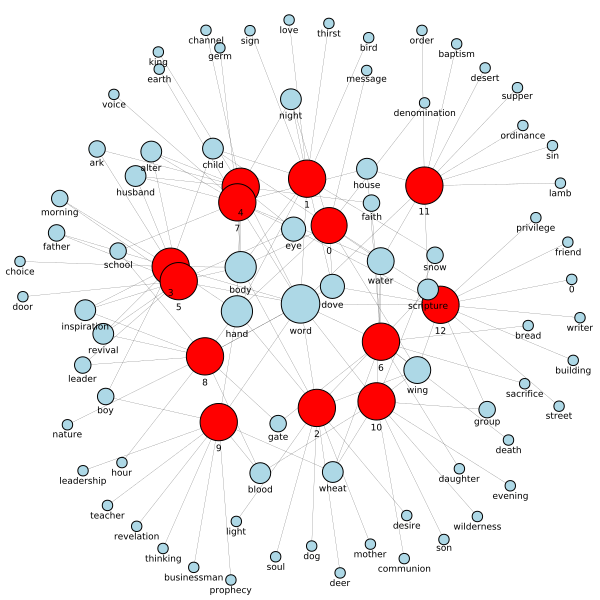

In [187]:
plot(gr,
     vertex_color=colors,
     vertex_size=15*degree,
     vertex_label_size=9,
     vertex_label_dist=1.2,
     vertex_label=gr.vs['name'],
     edge_width=0.2
)

## Make projections of Bipartite Graph

In [188]:
#grt is projection with topics, grw is projection with words
grt,grw = gr.bipartite_projection()

### Topic Projection Graph

In [189]:
summary(grt)

IGRAPH UNWT 13 78 -- 
+ attr: name (v), type (v), weight (e)


In [190]:
grt.vertex_attributes()

['type', 'name']

In [191]:
grt.vs['name']

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [192]:
#vertex size proportional to degree of vertex
degree = np.array(grt.degree())
degree = 1 + degree
degree = np.log(degree)

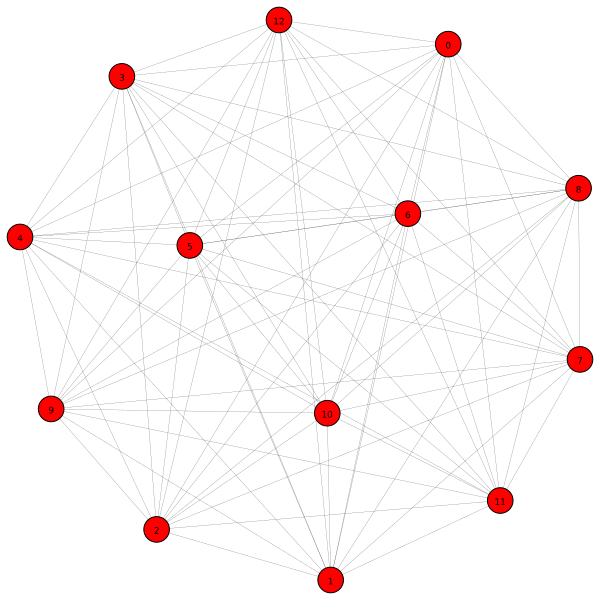

In [193]:
plot(grt,
     vertex_size=10*degree,
     vertex_label_size=9,
     #vertex_label_dist=1.4,
     vertex_label=grt.vs['name'],
     edge_width=0.2
)

### Word Projection Graph

In [194]:
summary(grw)

IGRAPH UNWT 75 592 -- 
+ attr: name (v), type (v), weight (e)


In [195]:
grw.vertex_attributes()

['type', 'name']

In [196]:
#vertex size proportional to degree of vertex
degree = np.array(grw.degree())
degree = 1 + degree
degree = np.log(degree)

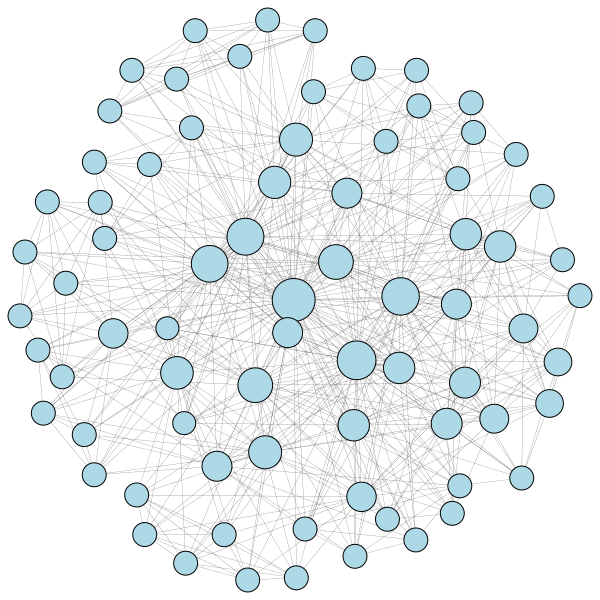

In [197]:
plot(grw,
     vertex_color='lightblue',
     vertex_size=10*degree,
     vertex_label_size=9,
     #vertex_label_dist=1.4,
     #vertex_label=grw.vs['name'],
     edge_width=0.2
)